In [9]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
!pip install pyforest
import seaborn as sns  # library for visualizations
%matplotlib inline
import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14608 sha256=222281535cd69494bf067be46132fba993ff9f8f1af0b37952f9dd6252af7685
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [10]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('A & B shingles.csv')

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.



**Ans:** The null hypothesis states that the moisture content of sample A and sample B is greater or thanequal to the permissible limit,mean≥ 0.35, and the alternative hypothesis states that the moisture content ofsample A and sample B is less than permissible limit,mean<0.35.Null Hypotheses (H0): ≥ 0.35 Alternative Hypotheses (H1):mean < 0.35

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [8]:
df.shape

(36, 2)

In [6]:
df.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


**2.1** Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


In [16]:
##Here we need to consider significance level(α) = 0.05 as given in the question.
?stats.ttest_1samp

In [13]:
stats.ttest_1samp(df['A'],0.35, nan_policy= 'omit', alternative = 'less')

TtestResult(statistic=-1.4735046253382782, pvalue=0.07477633144907513, df=35)

As the Pvalue is greate than Alpha henace we will reject the alternative hypothesis.

Also it is evident that moisture contents are higher than permissible limits.

In [14]:
stats.ttest_1samp(df['B'],0.35, nan_policy= 'omit', alternative = 'less')

TtestResult(statistic=-3.1003313069986995, pvalue=0.0020904774003191813, df=30)

As the Pvalue is less than Alpha henace we will reject the null hypothesis.

Also it is evident that moisture contents are less than permissible limits.

**2.2** Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

We have two samples and the sizes for both samples are not the same. The sample size is, n > 30.
So, we use the t distribution and the t-test statistic for two sample tests.

To check the population, mean(s) for shingles A and B whether the mean for shingles A and Shingles B are
the same, the null hypothesis states that the mean of shingle A to mean of shingle B are the same, μa
equals μb. The alternative hypothesis states that the mean is different, μa is not equal to μb.

We can frame the Hypotheses as:

**Null Hypotheses**(H0): μa = μb

**Alternative Hypotheses** (Ha): μa -= μb

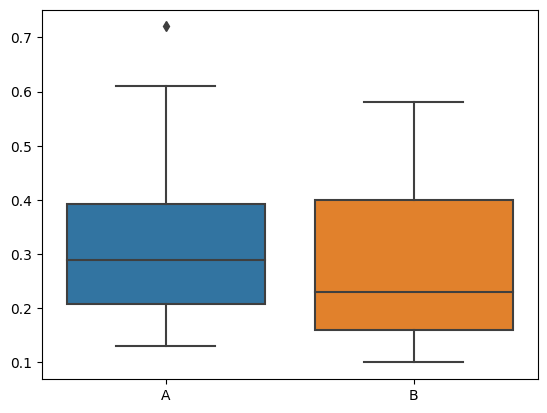

In [19]:
sns.boxplot(df);

As per box plot the mean of both A & B samples looks different

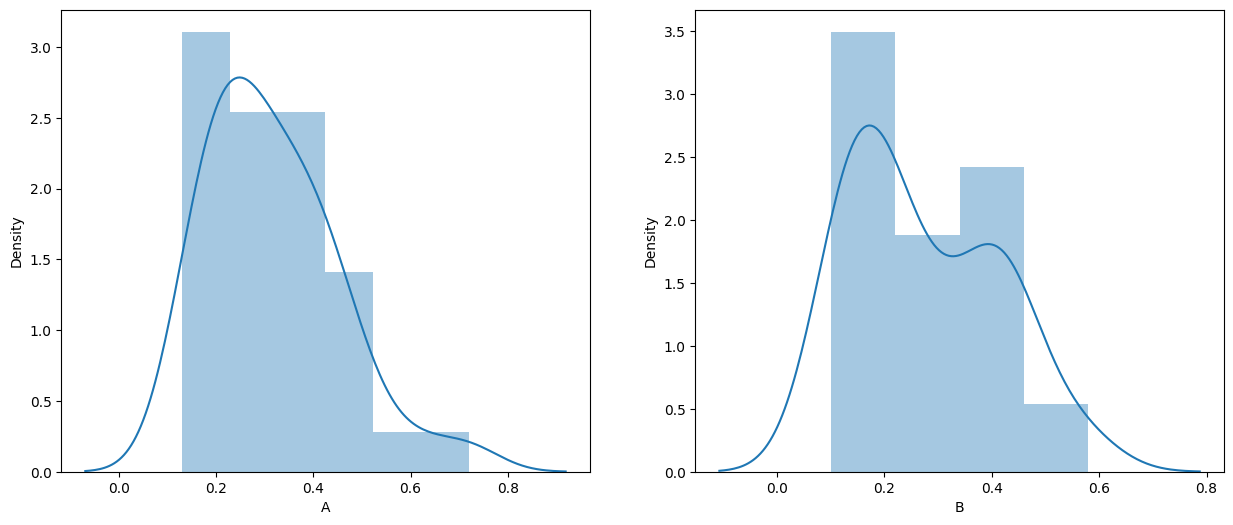

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['A'])

plt.subplot(1,2,2)
sns.distplot(df['B']);

Data looks like equally distributed

Conducting statiscal test

In [23]:
stats.ttest_ind(df['A'],df['B'], nan_policy ='omit', alternative = 'two-sided')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.20174965718353277)

** Here p-value is greater than level of significance so we have to to reject the alternative hypothesis in favour of null hypothesis.

We can conclude that mean for shingles-A and singles-B are the same.